In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/score.csv')
df['학년'] = [3,3,2,1,1,3,2,2]

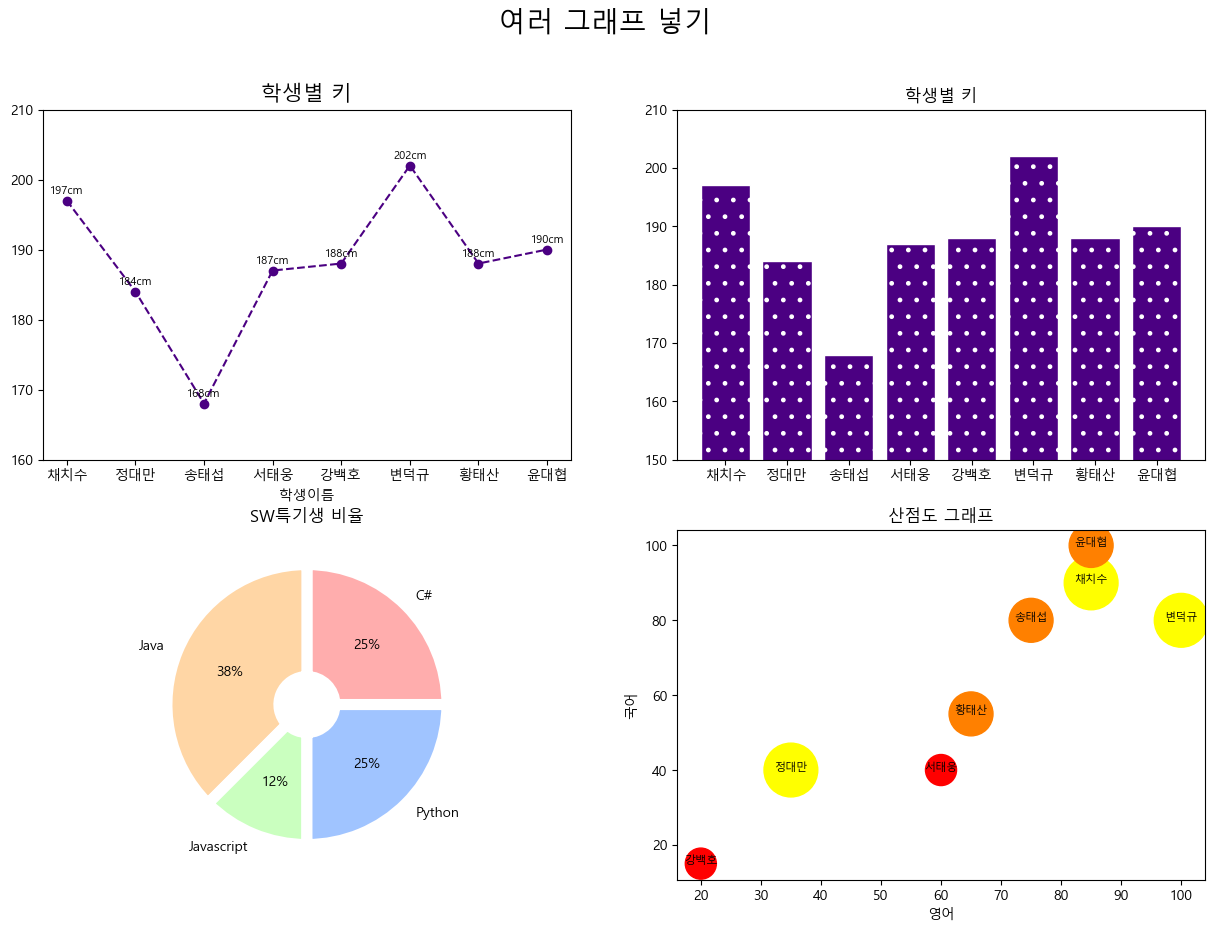

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('여러 그래프 넣기', size=20)
#첫번재 그래프
axs1 = axs[0, 0]
axs1.set_title('학생별 키', size=15)
axs1.plot(df['이름'], df['키'], marker='o', ls='--', color='indigo')
axs1.set_xlabel('학생이름')
for idx in range(len(df)):
    x = idx
    y = df.loc[idx, '키']
    text = f'{y}cm'
    axs1.text(x, y+1, text, size=8, ha='center')
    axs1.set_ylim(160,210)

#두번째 그래프
axs2 = axs[0, 1]
axs2.set_title('학생별 키')
axs2.bar(df['이름'], df['키'], hatch='.', ec='w', color='indigo')
axs2.set_ylim(150,210)

#세번째 그래프
axs3 = axs[1,0]
axs3.set_title('SW특기생 비율')
group = df.groupby('SW특기').size()
colors = ['#FFADAD','#FFD6A5','#CAFFBF','#A0C4FF']
axs3.pie(group.values, labels=group.index, autopct='%.0f%%', wedgeprops={'width':0.8, 'edgecolor':'w','linewidth':8},
        colors=colors)

#네번째 그래프
axs4 = axs[1,1]
axs4.set_title('산점도 그래프')
axs4.scatter(df['영어'], df['국어'], sizes=df['학년'] * 500,c=df['학년'], cmap='autumn')
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y = df.loc[idx, '국어']
    x = df.loc[idx, '영어']
    name = df.loc[idx, '이름']
    axs4.text(x,y,name, ha='center', size=8)

plt.show()

In [10]:
df = pd.read_csv('data/score.csv', index_col='지원번호')
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
df


,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


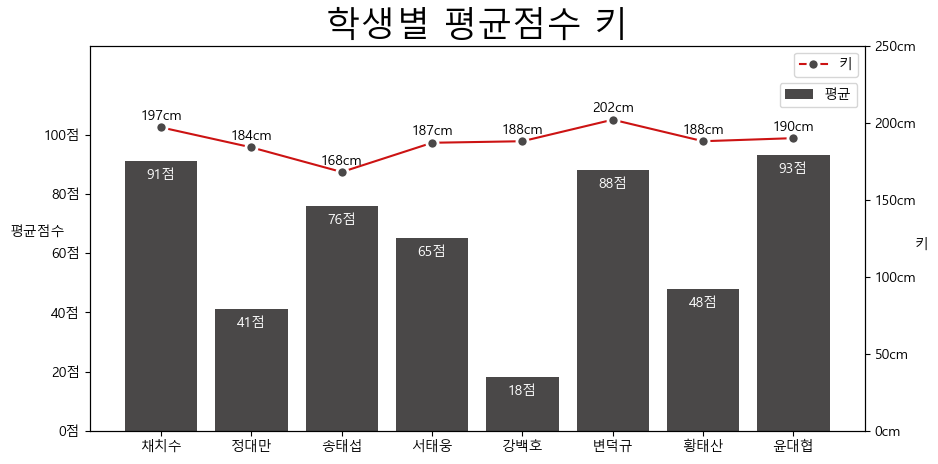

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('학생별 평균점수 키', size=25)
ax.bar(df['이름'], df['평균'], color="#4A4848", label='평균')
ax.legend(loc=(0.89,0.84))
ax.set_ylim(0,130)
yticks = [y for y in range(0,101,20)]
ax.set_yticks(yticks, [f'{y}점' for y in range(0,101,20)])
ax.set_ylabel('평균점수', rotation=360)
for idx, y in enumerate(df['평균']):
    ax.text(idx,y-6,f'{y:.0f}점',ha='center',color='w')


ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'], marker='o', label='키', color="#c80000ec",
         markersize=8, markerfacecolor = "#4A4848", markeredgecolor='w',
         markeredgewidth=2)
ax2.legend()
ax2.set_ylim(0,250)
yticks = [y for y in range(0,251,50)]
ax2.set_yticks(yticks, [f'{y}cm' for y in range(0,251,50)])
ax2.set_ylabel('키', rotation=360)
for idx, y in enumerate(df['키']):
    ax2.text(idx,y+5,f'{y}cm',ha='center')

plt.savefig('data/평균과점수와키.png')

plt.show()